<a href="https://colab.research.google.com/github/ameralhomdy/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module1-linear-algebra-review/Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 - Scalars and Vectors

For the questions below it is not sufficient to simply provide answer to the questions, but you must solve the problems and show your work using python (the NumPy library will help a lot!) Translate the vectors and matrices into their appropriate python  representations and use numpy or functions that you write yourself to demonstrate the result or property. 

## 1.1 Create a two-dimensional vector and plot it on a graph

In [0]:
v1 = [.2, .5]

## 1.2 Create a three-dimensional vecor and plot it on a graph

In [0]:
v2 = [.2, .5, 1]

## 1.3 Scale the vectors you created in 1.1 by $5$, $\pi$, and $-e$ and plot all four vectors (original + 3 scaled vectors) on a graph. What do you notice about these vectors? 

In [19]:
from math import e, pi
print(e)
print(pi)

2.718281828459045
3.141592653589793


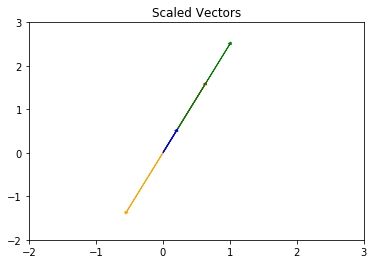

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# Multiply it by a scalar

green = np.multiply(5, v1)

red = np.multiply(math.pi, v1)

orange = np.multiply(-e, v1)

# Plot the Scaled Vectors
plt.arrow(0,0, red[0], red[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, green[0], green[1],head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, v1[0], v1[1],head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, orange[0], orange[1],head_width=.05, head_length=0.05, color ='orange')
plt.xlim(-2,3)          
plt.ylim(-2,3)
plt.title("Scaled Vectors")
plt.show()

## 1.4 Graph vectors $\vec{a}$ and $\vec{b}$ and plot them on a graph

\begin{align}
\vec{a} = \begin{bmatrix} 5 \\ 7 \end{bmatrix}
\qquad
\vec{b} = \begin{bmatrix} 3 \\4 \end{bmatrix}
\end{align}

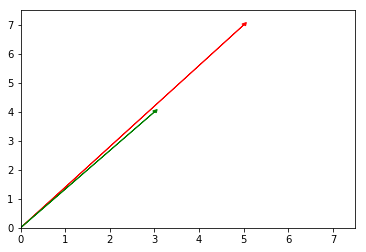

In [37]:
a = [5, 7]
b = [3, 4]
plt.arrow(0, 0, a[0], a[1], head_width=0.1, head_length=0.1, color='red')
plt.arrow(0, 0, b[0], b[1], head_width=0.1, head_length=0.1, color='green')
plt.xlim(0, 7.5)
plt.ylim(0, 7.5)
plt.show()

## 1.5 find $\vec{a} - \vec{b}$ and plot the result on the same graph as $\vec{a}$ and $\vec{b}$. Is there a relationship between vectors $\vec{a} \thinspace, \vec{b} \thinspace \text{and} \thinspace \vec{a-b}$

[2 3]


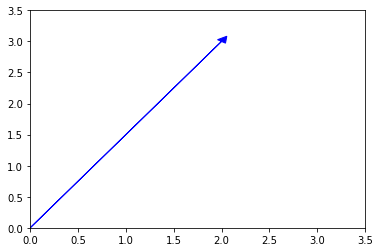

In [44]:
np_a = np.array(a)
np_b = np.array(b)

a_b = np_a - np_b

print(a_b)

plt.arrow(0, 0, a_b[0], a_b[1], head_width=0.1, head_length=0.1, color='blue')
plt.xlim(0, 3.5)
plt.ylim(0, 3.5)
plt.show()

## 1.6 Find $c \cdot d$

\begin{align}
\vec{c} = \begin{bmatrix}7 & 22 & 4 & 16\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}12 & 6 & 2 & 9\end{bmatrix}
\end{align}


In [45]:
c = np.array([7, 22, 4, 16])
d = np.array([12, 6, 2, 9])

(c*d).sum()

368

##  1.7 Find $e \times f$

\begin{align}
\vec{e} = \begin{bmatrix} 5 \\ 7 \\ 2 \end{bmatrix}
\qquad
\vec{f} = \begin{bmatrix} 3 \\4 \\ 6 \end{bmatrix}
\end{align}

In [46]:
e = np.array([5, 7, 2])
f = np.array([3, 4, 6])

e * f

array([15, 28, 12])

## 1.8 Find $||g||$ and then find $||h||$. Which is longer?

\begin{align}
\vec{g} = \begin{bmatrix} 1 \\ 1 \\ 1 \\ 8 \end{bmatrix}
\qquad
\vec{h} = \begin{bmatrix} 3 \\3 \\ 3 \\ 3 \end{bmatrix}
\end{align}

In [93]:
g = np.array([1,1,1,8])
h = np.array([3,3,3,3])

norm_g = np.linalg.norm(g)
norm_h = np.linalg.norm(h)

print('Norm of vector g:', norm_g)
print('Norm of vector h:', norm_h)

Norm of vector g: 8.18535277187245
Norm of vector h: 6.0


# Part 2 - Matrices

## 2.1 What are the dimensions of the following matrices? Which of the following can be multiplied together? See if you can find all of the different legal combinations.
\begin{align}
A = \begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{bmatrix}
\qquad
B = \begin{bmatrix}
2 & 4 & 6 \\
\end{bmatrix}
\qquad
C = \begin{bmatrix}
9 & 6 & 3 \\
4 & 7 & 11
\end{bmatrix}
\qquad
D = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\qquad
E = \begin{bmatrix}
1 & 3 \\
5 & 7
\end{bmatrix}
\end{align}

In [0]:
a = np.array([[1,2], 
              [3,4],
              [5,6]])
b = np.array([2, 4, 6])
c = np.array([[9,6,3], 
              [4,7,11]])
d = np.array([[1,0,0], 
              [0,1,0],
              [0, 0, 1]])
e = np.array([[1,3], 
              [5,7]])

**The legal multiplications are**
-  A and C
- A and E
- B and A
- B and D
- C and A
- C and D
- D annd A
- E and C

## 2.2 Find the following products: CD, AE, and BA. What are the dimensions of the resulting matrices? How does that relate to the dimensions of their factor matrices?

In [69]:
np.matmul(c, d)

array([[ 9,  6,  3],
       [ 4,  7, 11]])

In [67]:
f = a.dot(e)
print(f)

[[11 17]
 [23 37]
 [35 57]]


In [68]:
np.matmul(a, e)

array([[11, 17],
       [23, 37],
       [35, 57]])

In [70]:
np.matmul(b, a)

array([44, 56])

## 2.3  Find $F^{T}$. How are the numbers along the main diagonal (top left to bottom right) of the original matrix and its transpose related? What are the dimensions of $F$? What are the dimensions of $F^{T}$?

\begin{align}
F = 
\begin{bmatrix}
20 & 19 & 18 & 17 \\
16 & 15 & 14 & 13 \\
12 & 11 & 10 & 9 \\
8 & 7 & 6 & 5 \\
4 & 3 & 2 & 1
\end{bmatrix}
\end{align}

In [73]:
f = np.array([[20,19,18,17],
              [16,15,14,13],
              [12,11,10,9],
              [8,7,6,5],
              [4,3,2,1]])
f_t = f.T
f_t

array([[20, 16, 12,  8,  4],
       [19, 15, 11,  7,  3],
       [18, 14, 10,  6,  2],
       [17, 13,  9,  5,  1]])

In [75]:
print('F dimension', f.shape)
print('F.T dimension', f_t.shape)

F dimension (5, 4)
F.T dimension (4, 5)


# Part 3 - Square Matrices

## 3.1 Find $IG$ (be sure to show your work) 😃

\begin{align}
G= 
\begin{bmatrix}
12 & 11 \\
7 & 10 
\end{bmatrix}
\end{align}

In [0]:
G = np.array([[12,11],
              [7,10]])
G_inv = (np.linalg.inv(G)) 

In [86]:
# Finding the identity matrix
I = np.matmul(G_inv, G)
I

array([[1.00000000e+00, 6.66133815e-16],
       [1.11022302e-16, 1.00000000e+00]])

In [87]:
# Finding IG
np.matmul(I, G)

array([[12., 11.],
       [ 7., 10.]])

## 3.2 Find $|H|$ and then find $|J|$.

\begin{align}
H= 
\begin{bmatrix}
12 & 11 \\
7 & 10 
\end{bmatrix}
\qquad
J= 
\begin{bmatrix}
0 & 1 & 2 \\
7 & 10 & 4 \\
3 & 2 & 0
\end{bmatrix}
\end{align}


In [88]:
H = np.array([[12, 11],
              [7,10]])
J = np.array([[0,1,2],
              [7,10,4],
              [3,2,0]])
H_det = np.linalg.det(H)
J_det = np.linalg.det(J)

print('H determinant:', H_det)
print('J determinant:', J_det)

H determinant: 43.000000000000014
J determinant: -19.999999999999996


## 3.3 Find $H^{-1}$ and then find $J^{-1}$

In [90]:
H_inv = np.linalg.inv(H)
J_inv = np.linalg.inv(J)

print('H inverse:', H_inv)
print('J inverse:', J_inv)

H inverse: [[ 0.23255814 -0.25581395]
 [-0.1627907   0.27906977]]
J inverse: [[ 0.4  -0.2   0.8 ]
 [-0.6   0.3  -0.7 ]
 [ 0.8  -0.15  0.35]]


## 3.4 Find $HH^{-1}$ and then find $J^{-1}J$. Is $HH^{-1} == J^{-1}J$? Why or Why not?

In [91]:
np.matmul(H, H_inv)

array([[1.00000000e+00, 5.55111512e-16],
       [2.22044605e-16, 1.00000000e+00]])

In [92]:
np.matmul(J_inv, J)

array([[ 1.00000000e+00,  2.22044605e-16,  0.00000000e+00],
       [-1.11022302e-16,  1.00000000e+00,  0.00000000e+00],
       [-1.66533454e-16, -1.11022302e-16,  1.00000000e+00]])

**They are different because they have different dimensions**

# Stretch Goals: 

A reminder that these challenges are optional. If you finish your work quickly we welcome you to work on them. If there are other activities that you feel like will help your understanding of the above topics more, feel free to work on that. Topics from the Stretch Goals sections will never end up on Sprint Challenges. You don't have to do these in order, you don't have to do all of them. 

- Write a function that can calculate the dot product of any two vectors of equal length that are passed to it.
- Write a function that can calculate the norm of any vector
- Prove to yourself again that the vectors in 1.9 are orthogonal by graphing them. 
- Research how to plot a 3d graph with animations so that you can make the graph rotate (this will be easier in a local notebook than in google colab)
- Create and plot a matrix on a 2d graph.
- Create and plot a matrix on a 3d graph.
- Plot two vectors that are not collinear on a 2d graph. Calculate the determinant of the 2x2 matrix that these vectors form. How does this determinant relate to the graphical interpretation of the vectors?

